In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/unemployment-dataset/unemployment analysis.csv")

In [16]:
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [5]:
df.isnull().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [7]:
Pais = []
Code = [] 
Ano = []
Desemprego = []
column_names = df.columns[2:]

for index, row in df.iterrows():
    for temp_year in column_names:
        Pais.append(row['Country Name'])
        Code.append(row['Country Code'])
        Ano.append(temp_year)
        Desemprego.append(row[temp_year])
        
df2 = pd.DataFrame(data={'Pais': Pais,'Code': Code,'Ano': Ano,'Desemprego': Desemprego})
df2.head()

,Pais,Code,Ano,Desemprego
0,Africa Eastern and Southern,AFE,1991,7.80
1,Africa Eastern and Southern,AFE,1992,7.84
2,Africa Eastern and Southern,AFE,1993,7.85
3,Africa Eastern and Southern,AFE,1994,7.84
4,Africa Eastern and Southern,AFE,1995,7.83


Insira o país Brazil


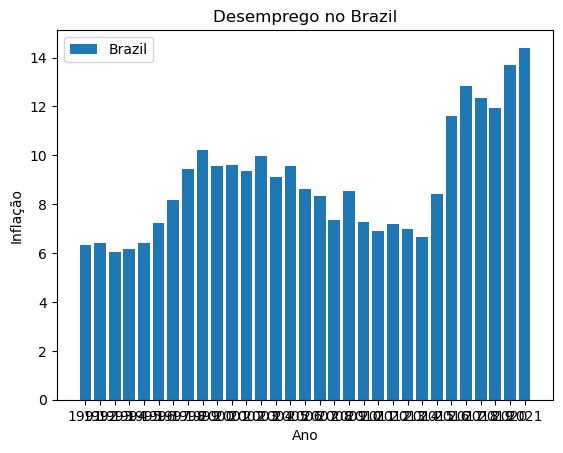

Ano com maior Desemprego: 2021
Ano com menor Desemprego: 1993


In [37]:
Pais = input("Insira o país")
df_pais = df2[df2['Pais'] == Pais]
Região = [Pais]
By_region = df2[df2['Pais'].isin(Região)]
paises = By_region['Pais'].unique()

for pais in paises:
    df_pais = By_region[By_region['Pais'] == pais]
    plt.bar(df_pais['Ano'], df_pais['Desemprego'], label=pais)

    plt.xlabel('Ano')
    plt.ylabel('Inflação')
    plt.title(f'Desemprego no {pais}')
    plt.legend()
    plt.show()

# Ano com maior Desemprego no pais selecionado
Ano_maior_Desemprego = df_pais.groupby('Ano')['Desemprego'].sum().idxmax()
print(f"Ano com maior Desemprego: {Ano_maior_Desemprego}")
# Região com menor inflação no período
Ano_menor_Desemprego = df_pais.groupby('Ano')['Desemprego'].sum().idxmin()
print(f"Ano com menor Desemprego: {Ano_menor_Desemprego}")


In [13]:
fig = px.choropleth(df2, locations="Code",
                    color="Desemprego",
                    hover_name="Pais", 
                    animation_frame="Ano",
                    range_color=(0, 30),
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mapa interativo')
fig.show()